# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,speaker,transcript
855,tyrion,your grace i know my brother he came here alo...
117,cersei,your mother might have prepared you you flowe...
341,jaime,she did she lied to me as well she never had ...
156,daenerys,who stabbed him in the back and cut his throa...
358,jon,we need every man we can get i thought wed lo...
746,sansa,youre right we cant trust him he attacked my ...
176,davos,you are now look i made it through most of my...
884,varys,oh lord tyrion come in come in oh always in c...
29,arya,you make my weapon yet you should make mine f...
866,tywin,wolfsbane a rare substance this is no common ...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,speaker,transcript,polarity,subjectivity
855,tyrion,your grace i know my brother he came here alo...,0.102383,0.554615
117,cersei,your mother might have prepared you you flowe...,0.113704,0.540645
341,jaime,she did she lied to me as well she never had ...,0.094610,0.537120
156,daenerys,who stabbed him in the back and cut his throa...,0.141795,0.517120
358,jon,we need every man we can get i thought wed lo...,0.086104,0.502844
746,sansa,youre right we cant trust him he attacked my ...,0.078797,0.582921
176,davos,you are now look i made it through most of my...,0.122341,0.529719
884,varys,oh lord tyrion come in come in oh always in c...,0.108902,0.563178
29,arya,you make my weapon yet you should make mine f...,0.039735,0.527465
866,tywin,wolfsbane a rare substance this is no common ...,0.119720,0.541894


In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

for index in data.index:
    x = data.polarity.loc[index]
    y = data.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['speaker'][index], fontsize=12)
    plt.xlim(-.01, .18) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Polarity Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Subjectivity Facts -------- Opinions -->', fontsize=15)

plt.show()

<Figure size 2000x1000 with 1 Axes>

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [53]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=30):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [54]:
# Let's take a look at our data again
data

,speaker,transcript,polarity,subjectivity
855,tyrion,your grace i know my brother he came here alo...,0.102383,0.554615
117,cersei,your mother might have prepared you you flowe...,0.113704,0.540645
341,jaime,she did she lied to me as well she never had ...,0.094610,0.537120
156,daenerys,who stabbed him in the back and cut his throa...,0.141795,0.517120
358,jon,we need every man we can get i thought wed lo...,0.086104,0.502844
746,sansa,youre right we cant trust him he attacked my ...,0.078797,0.582921
176,davos,you are now look i made it through most of my...,0.122341,0.529719
884,varys,oh lord tyrion come in come in oh always in c...,0.108902,0.563178
29,arya,you make my weapon yet you should make mine f...,0.039735,0.527465
866,tywin,wolfsbane a rare substance this is no common ...,0.119720,0.541894


In [55]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' your grace i know my brother he came here alone knowing full well how hed be received why would he do that if he werent telling the truth i was a fool i suspect one of you will be wearing this before its all over well here we are together again and the masses rejoice shes your new queen too they remember what happened the last time targaryens brought dragons north theyll come around once they see daenerys is different she is i am its hard to blame her i made a mistake common to clever people i underestimated my opponents cersei told me the pregnancy had changed her a chance for you both to start again and i believed her was she lying about the baby too she never fooled you you always knew exactly what she was and you loved her anyway so were going to die at winterfell not the death i wouldve chosen i always pictured myself dying in my own bed the age of  with a belly full of wine and my cock at least cersei wont get to murder me im sure ill feel some satisfaction denying her that p

In [56]:
# The list has 15 elements, one for each transcript
len(list_pieces)

15

In [57]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

30

In [58]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.09432857632010176,
  0.1243149083426861,
  0.11821495687774758,
  0.08632086167800453,
  0.02850421120829285,
  0.10817733990147779,
  0.18075980392156862,
  0.1955654761904762,
  0.08931304996373489,
  0.14898522447818224,
  0.058759772565742684,
  0.06785956380783967,
  0.1640473887814313,
  0.05542039771491826,
  0.09273299319727889,
  0.08477939198278182,
  0.1294961704961705,
  0.20018587815197977,
  0.029353805916305927,
  0.12242927106563468,
  0.06862882653061222,
  0.09248681006493507,
  0.06835169391139544,
  0.018513708513708507,
  0.08498329156223897,
  0.09880952380952382,
  0.0991142629300524,
  0.11265760281385277,
  0.10360492681921254,
  0.14819680319680315],
 [0.18352418745275886,
  0.23809325396825395,
  0.13381313131313133,
  0.03128787878787879,
  0.10980725623582764,
  0.1262349257884972,
  0.24583333333333335,
  0.13740079365079363,
  0.2849231032125769,
  0.2257930672268908,
  0.11722972972972974,
  0.10581196581196582,
  0.08582922824302133,
  0.03071284271

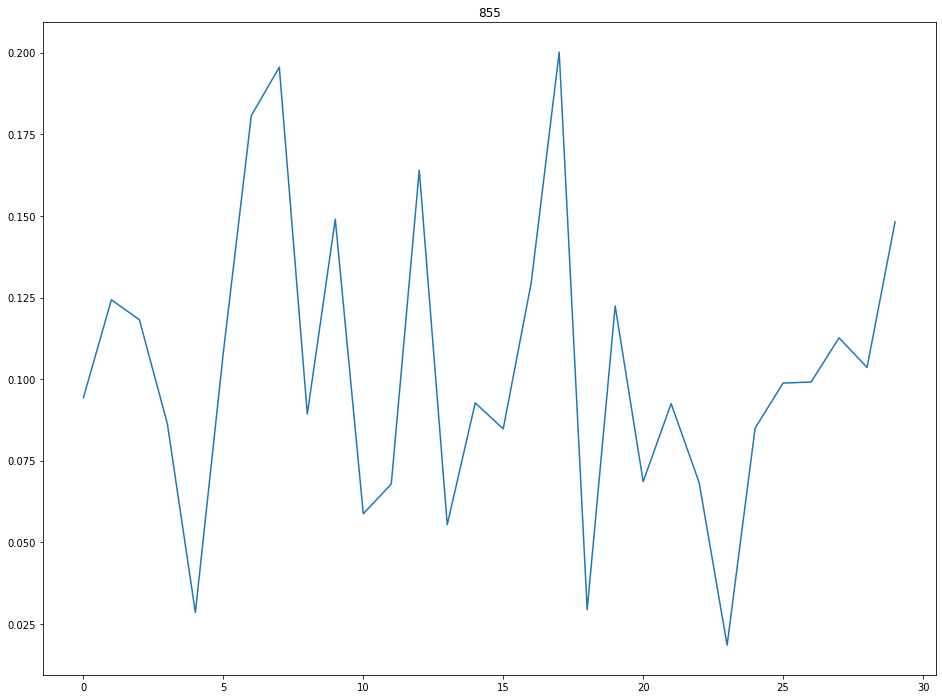

In [59]:
# Show the plot for one character
plt.plot(polarity_transcript[0])
plt.title(data['speaker'].index[0])
plt.show()

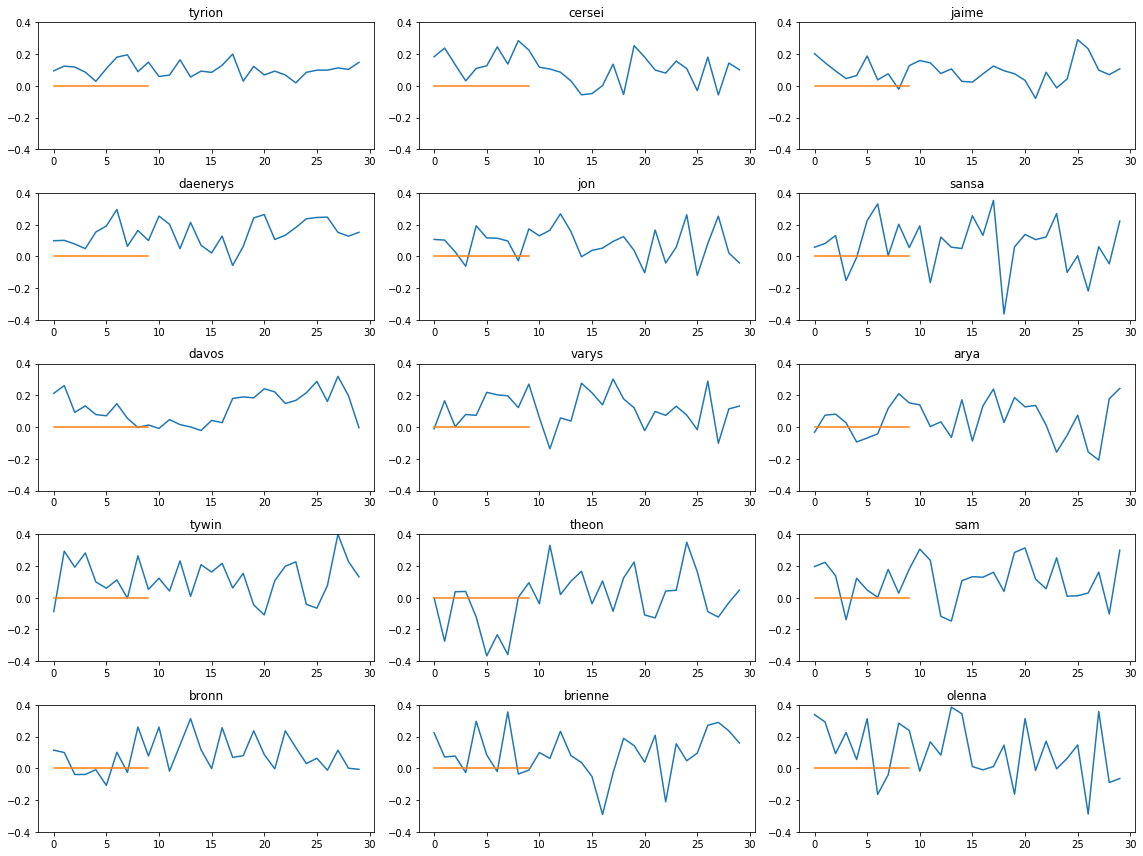

In [61]:
# Show the plot for all characters
plt.rcParams['figure.figsize'] = [16, 12]
for index, char_index in enumerate(data.index):
    plt.subplot(5, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['speaker'][char_index])
    plt.ylim(ymin=-.4, ymax=.4)
    
plt.tight_layout()

Tyrion Lannister stays generally positive throughout his routine. A similar characters is Jamie.

On the other hand, you have some pretty different patterns here like Sansa and Brienne who have had some pretty down moments.